In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler , MinMaxScaler, StandardScaler
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')
import missingno as msno
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [2]:
df= pd.read_csv('heart2022python.csv')
df.head()

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,...,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,HighRiskLastYear,CovidPos
0,0,2,4,0,1,9,0,0,0,0,...,10,1.60,71.67,27.99,0,0,1,1,0,0
1,1,2,0,0,1,6,0,0,0,0,...,11,1.78,95.25,30.13,0,0,1,1,0,0
2,1,2,0,0,0,8,0,0,0,0,...,12,1.85,108.86,31.66,1,0,0,1,0,1
3,0,4,5,0,1,9,0,0,0,0,...,13,1.70,90.72,31.32,0,0,1,1,0,1
4,0,3,3,15,1,5,0,0,0,0,...,13,1.55,79.38,33.07,0,0,1,1,0,0


In [3]:
df.shape
df['HadHeartAttack'].value_counts()


HadHeartAttack
0    232587
1     13435
Name: count, dtype: int64

In [4]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [5]:
df['HadHeartAttack'].value_counts()

HadHeartAttack
0    232061
1     13435
Name: count, dtype: int64

## wizualizacja danych

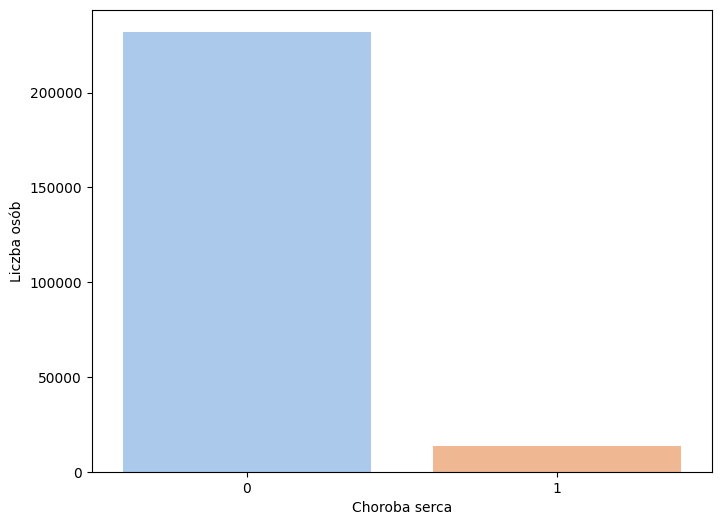

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(x='HadHeartAttack', data=df, palette='pastel')
plt.xlabel('Choroba serca')
plt.ylabel('Liczba osób')
plt.show()

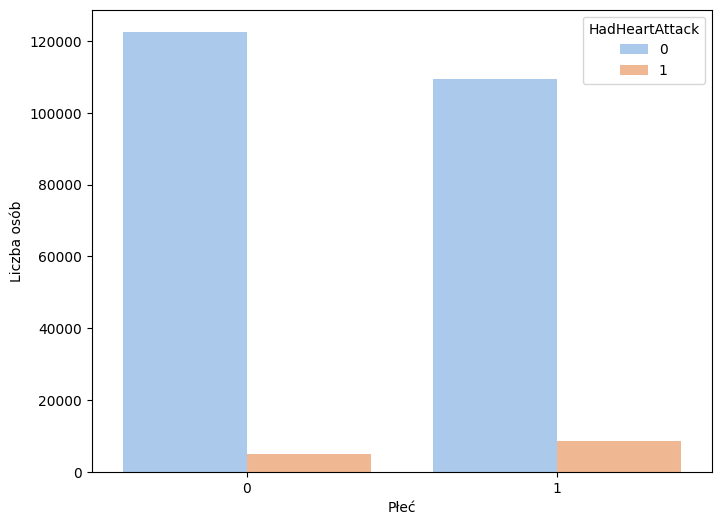

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Sex", data=df, hue="HadHeartAttack", palette="pastel")
plt.xlabel('Płeć')
plt.ylabel('Liczba osób')
plt.show()

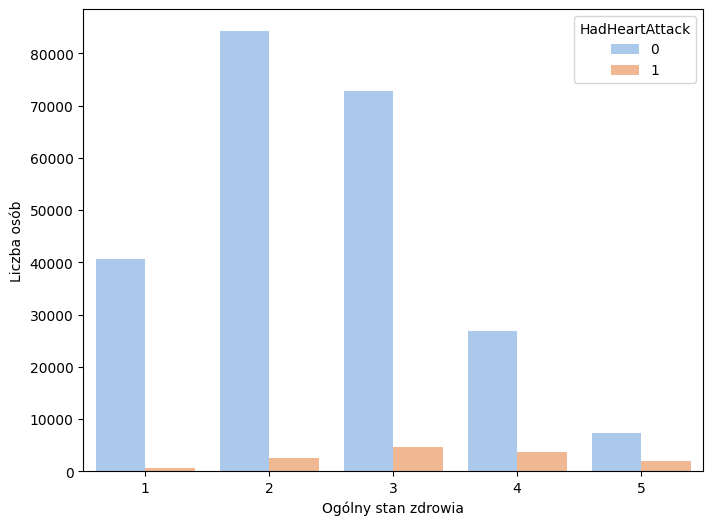

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x="GeneralHealth", data=df, hue="HadHeartAttack", palette="pastel")
plt.xlabel('Ogólny stan zdrowia')
plt.ylabel('Liczba osób')
plt.show()

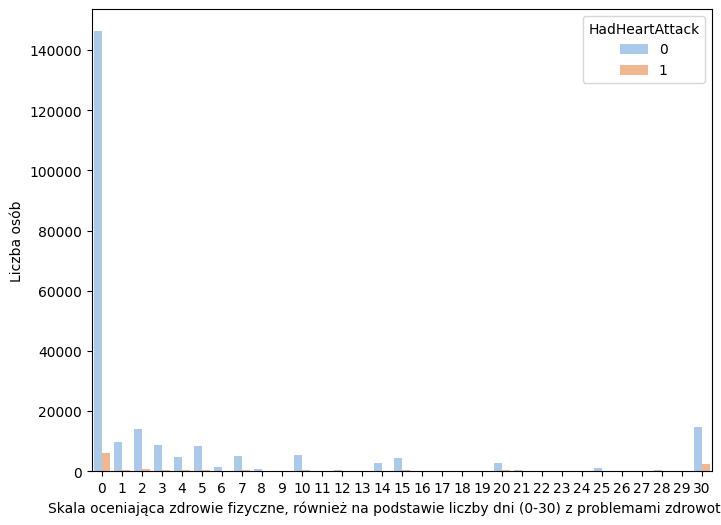

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x="PhysicalHealthDays", data=df, hue="HadHeartAttack", palette="pastel")
plt.xlabel('Skala oceniająca zdrowie fizyczne, również na podstawie liczby dni (0-30) z problemami zdrowotnymi')
plt.ylabel('Liczba osób')
plt.show()

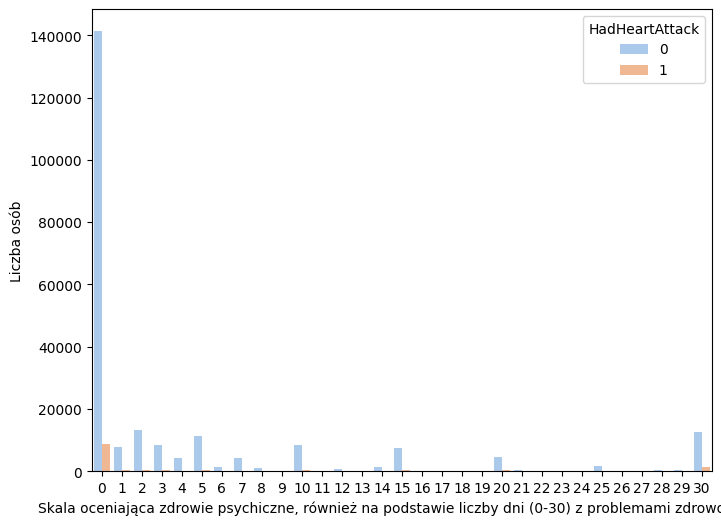

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x="MentalHealthDays", data=df, hue="HadHeartAttack", palette="pastel")
plt.xlabel('Skala oceniająca zdrowie psychiczne, również na podstawie liczby dni (0-30) z problemami zdrowotnymi')
plt.ylabel('Liczba osób')
plt.show()

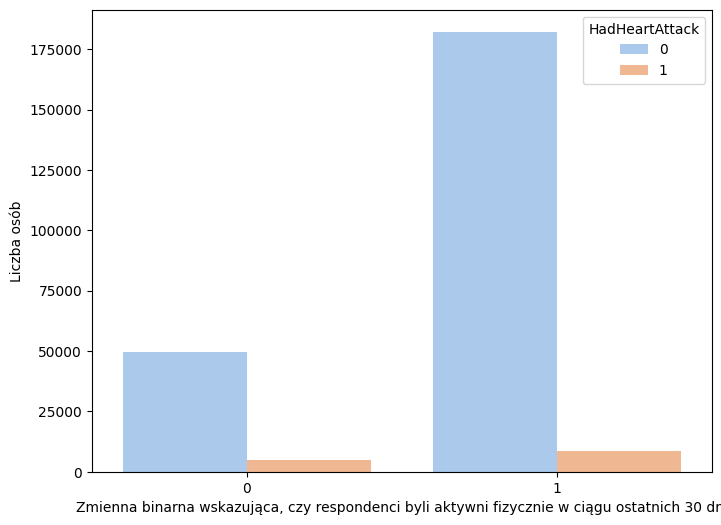

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x="PhysicalActivities", data=df, hue="HadHeartAttack", palette="pastel")
plt.xlabel('Zmienna binarna wskazująca, czy respondenci byli aktywni fizycznie w ciągu ostatnich 30 dni')
plt.ylabel('Liczba osób')
plt.show()

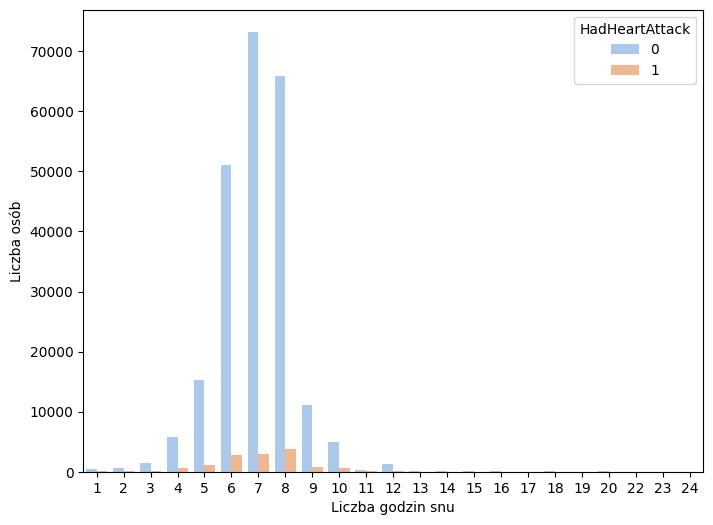

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x="SleepHours", data=df, hue="HadHeartAttack", palette="pastel")
plt.xlabel('Liczba godzin snu')
plt.ylabel('Liczba osób')
plt.show()

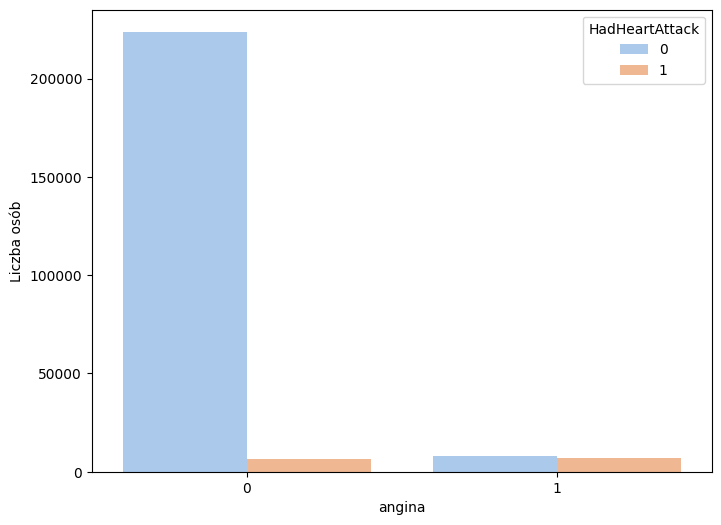

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x="HadAngina", data=df, hue="HadHeartAttack", palette="pastel")
plt.xlabel('angina')
plt.ylabel('Liczba osób')
plt.show()

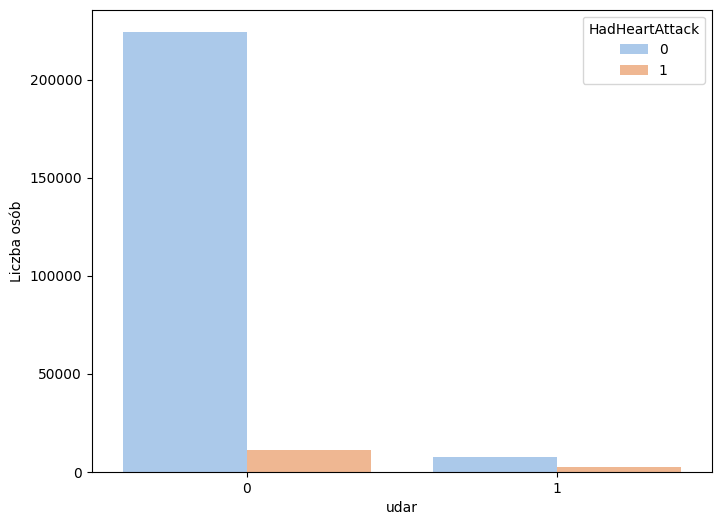

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x="HadStroke", data=df, hue="HadHeartAttack", palette="pastel")
plt.xlabel('udar')
plt.ylabel('Liczba osób')
plt.show()

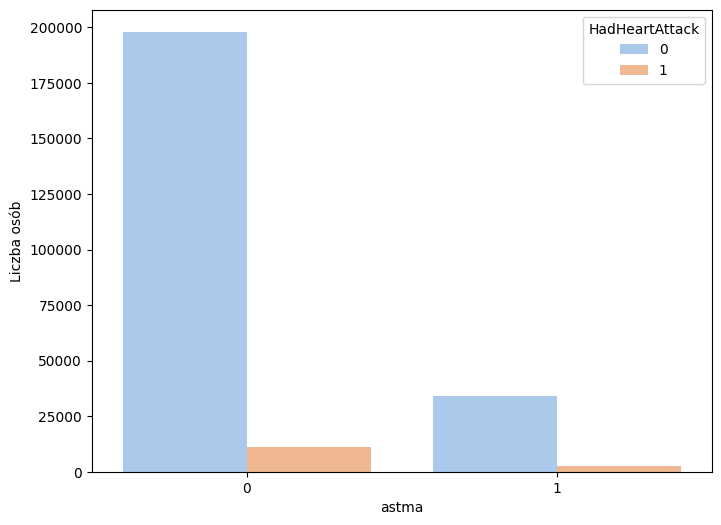

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x="HadAsthma", data=df, hue="HadHeartAttack", palette="pastel")
plt.xlabel('astma')
plt.ylabel('Liczba osób')
plt.show()

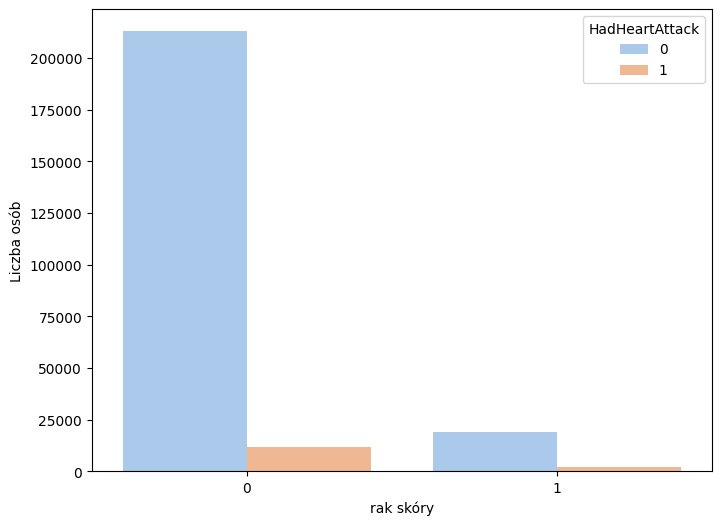

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x="HadSkinCancer", data=df, hue="HadHeartAttack", palette="pastel")
plt.xlabel('rak skóry')
plt.ylabel('Liczba osób')
plt.show()

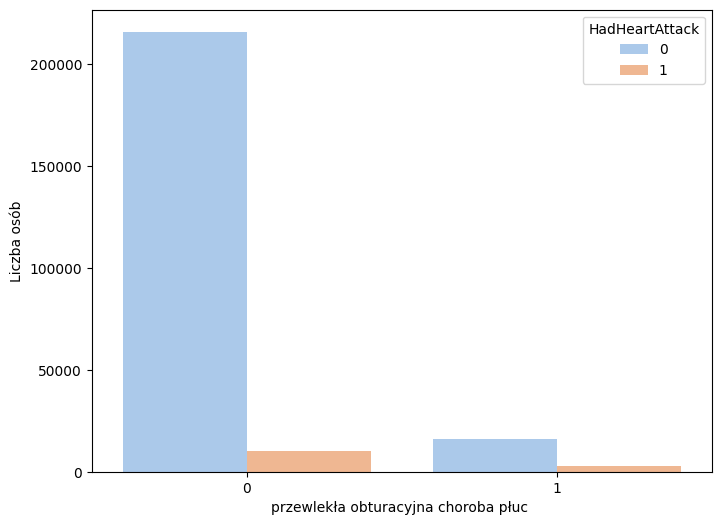

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x="HadCOPD", data=df, hue="HadHeartAttack", palette="pastel")
plt.xlabel('przewlekła obturacyjna choroba płuc ')
plt.ylabel('Liczba osób')
plt.show()

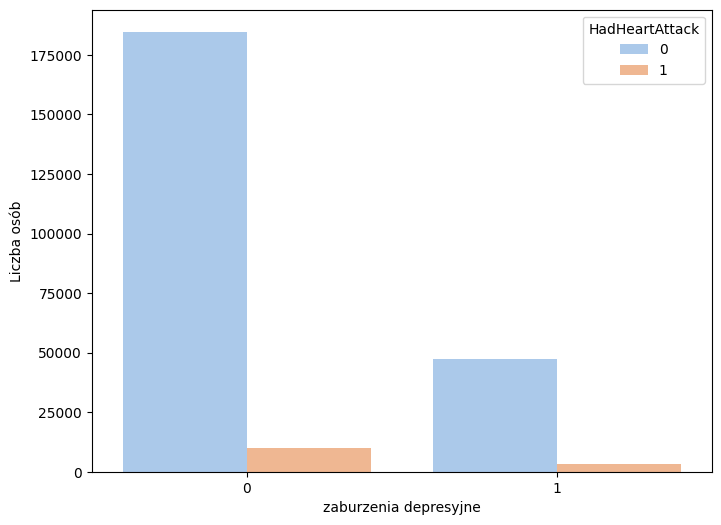

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x="HadDepressiveDisorder", data=df, hue="HadHeartAttack", palette="pastel")
plt.xlabel('zaburzenia depresyjne')
plt.ylabel('Liczba osób')
plt.show()

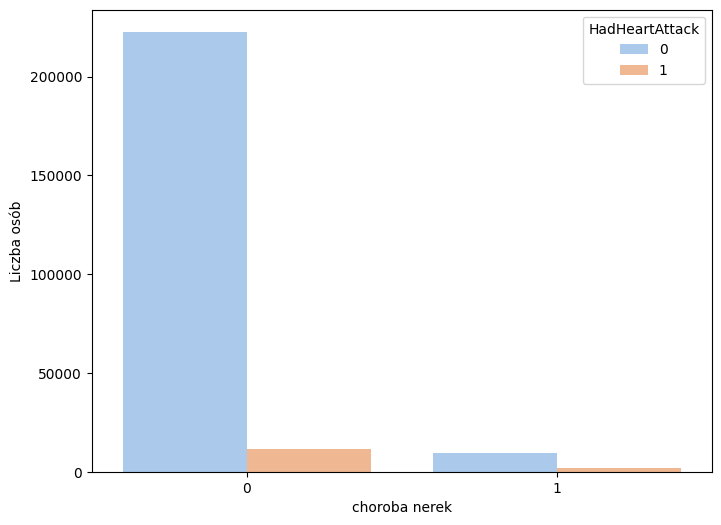

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x="HadKidneyDisease", data=df, hue="HadHeartAttack", palette="pastel")
plt.xlabel('choroba nerek')
plt.ylabel('Liczba osób')
plt.show()

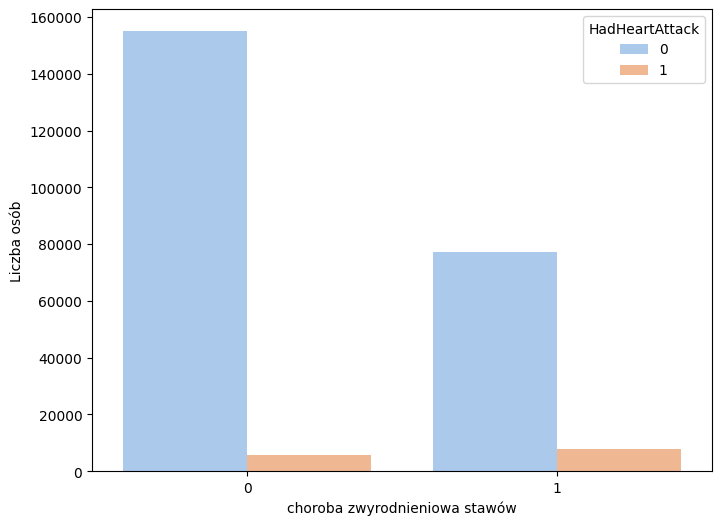

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x="HadArthritis", data=df, hue="HadHeartAttack", palette="pastel")
plt.xlabel('choroba zwyrodnieniowa stawów')
plt.ylabel('Liczba osób')
plt.show()

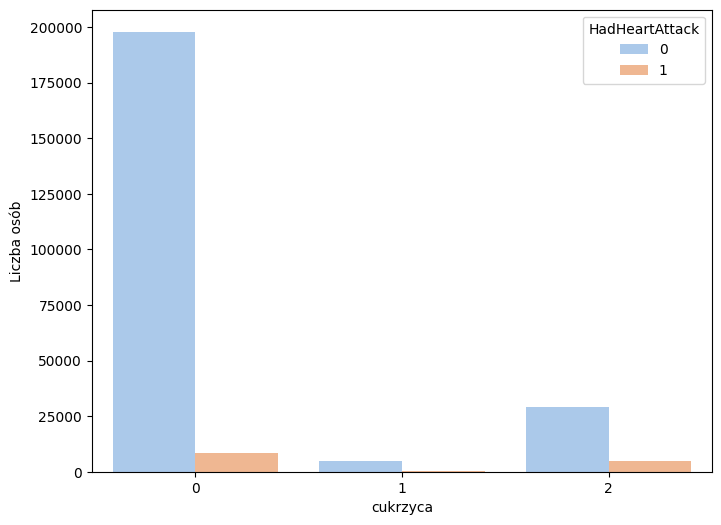

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(x="HadDiabetes", data=df, hue="HadHeartAttack", palette="pastel")
plt.xlabel('cukrzyca')
plt.ylabel('Liczba osób')
plt.show()

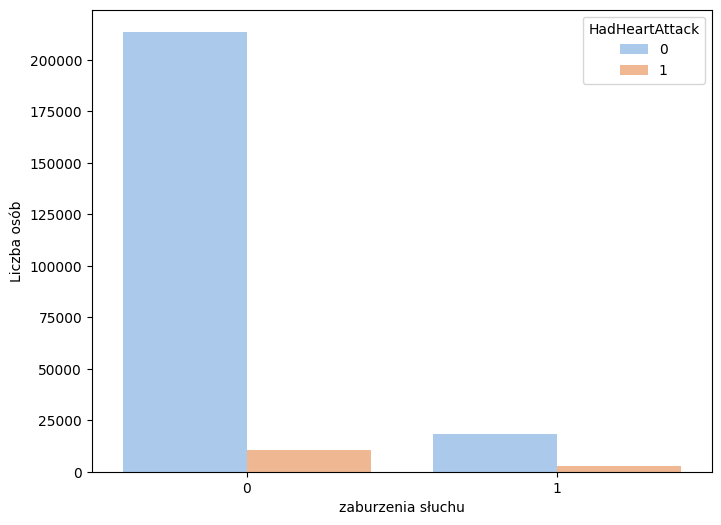

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x="DeafOrHardOfHearing", data=df, hue="HadHeartAttack", palette="pastel")
plt.xlabel('zaburzenia słuchu')
plt.ylabel('Liczba osób')
plt.show()

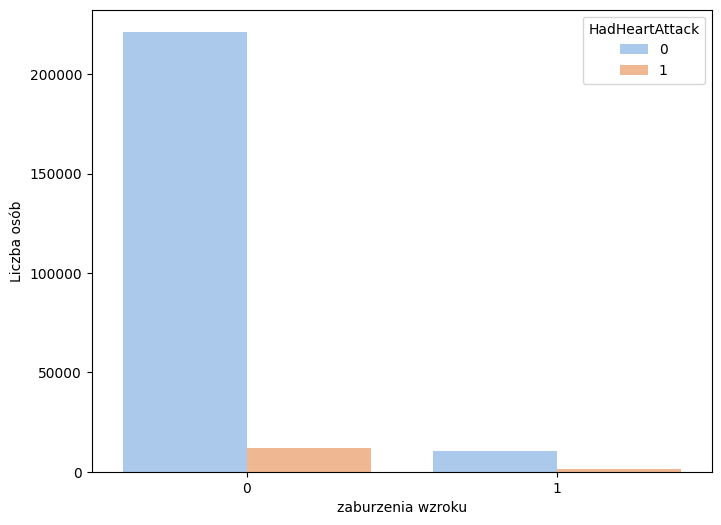

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(x="BlindOrVisionDifficulty", data=df, hue="HadHeartAttack", palette="pastel")
plt.xlabel('zaburzenia wzroku')
plt.ylabel('Liczba osób')
plt.show()

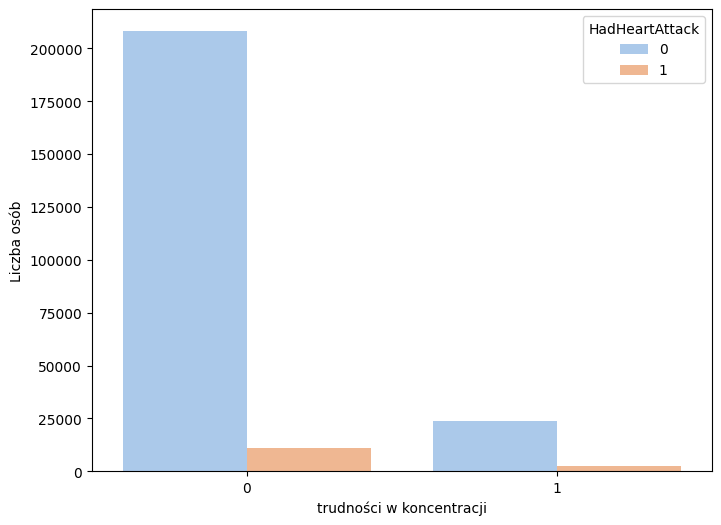

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(x="DifficultyConcentrating", data=df, hue="HadHeartAttack", palette="pastel")
plt.xlabel('trudności w koncentracji')
plt.ylabel('Liczba osób')
plt.show()

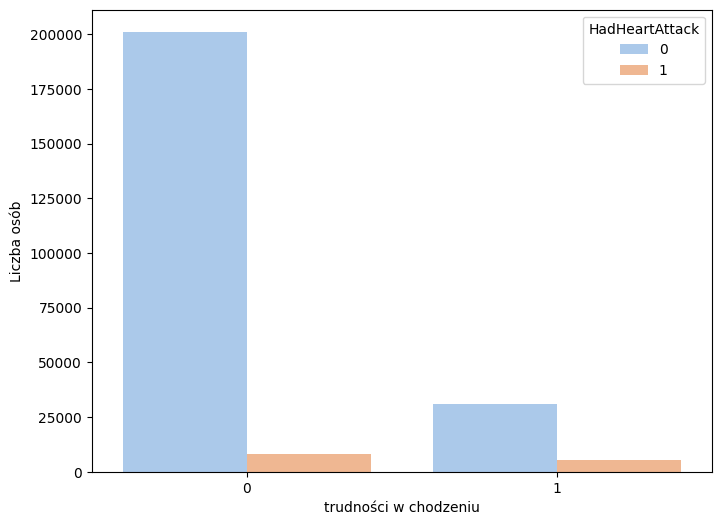

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(x="DifficultyWalking", data=df, hue="HadHeartAttack", palette="pastel")
plt.xlabel('trudności w chodzeniu')
plt.ylabel('Liczba osób')
plt.show()

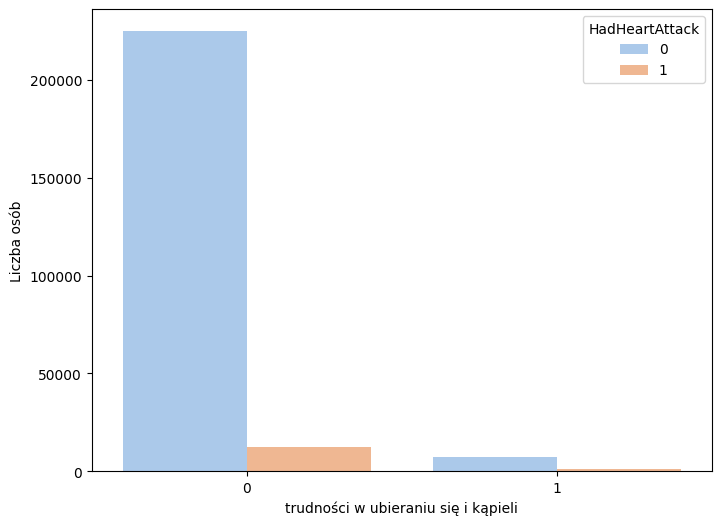

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(x="DifficultyDressingBathing", data=df, hue="HadHeartAttack", palette="pastel")
plt.xlabel('trudności w ubieraniu się i kąpieli')
plt.ylabel('Liczba osób')
plt.show()

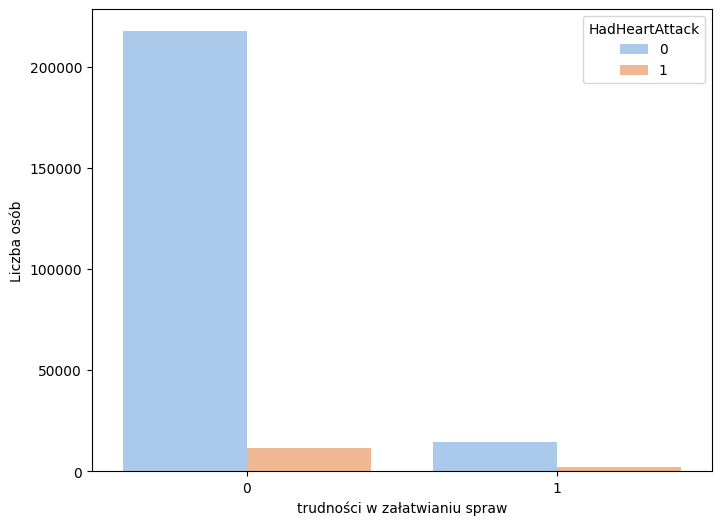

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(x="DifficultyErrands", data=df, hue="HadHeartAttack", palette="pastel")
plt.xlabel('trudności w załatwianiu spraw')
plt.ylabel('Liczba osób')
plt.show()

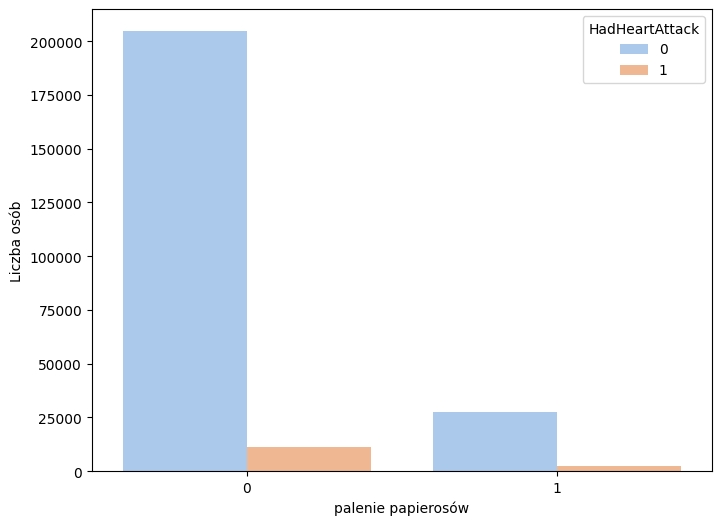

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(x="SmokerStatus", data=df, hue="HadHeartAttack", palette="pastel")
plt.xlabel('palenie papierosów')
plt.ylabel('Liczba osób')
plt.show()

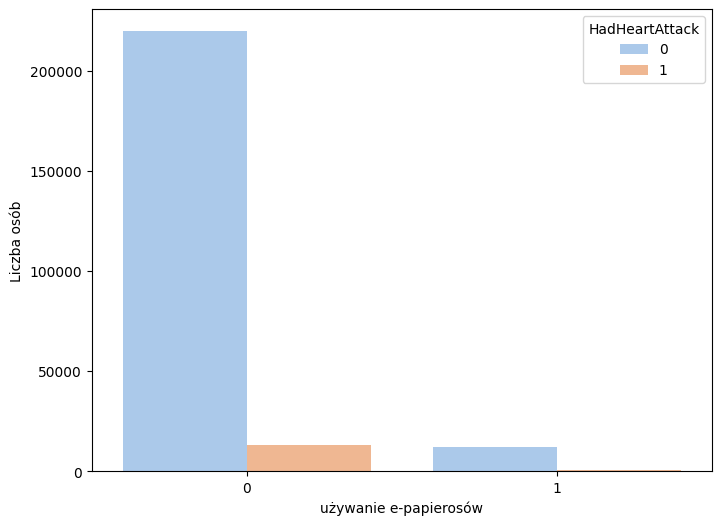

In [29]:
plt.figure(figsize=(8, 6))
sns.countplot(x="ECigaretteUsage", data=df, hue="HadHeartAttack", palette="pastel")
plt.xlabel('używanie e-papierosów')
plt.ylabel('Liczba osób')
plt.show()

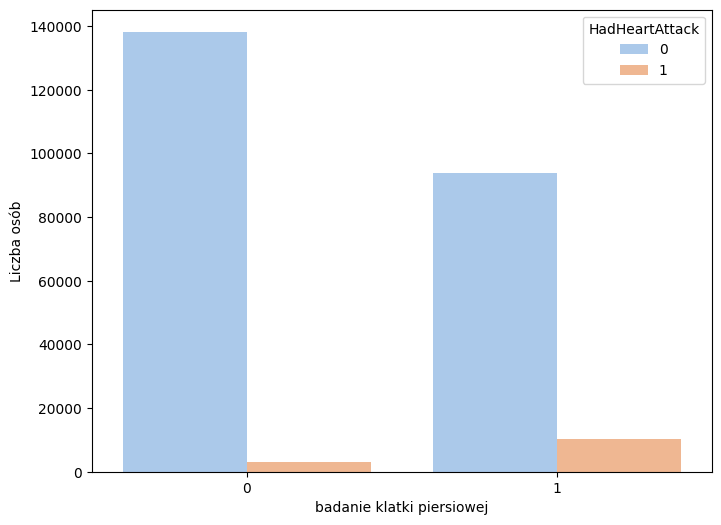

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(x="ChestScan", data=df, hue="HadHeartAttack", palette="pastel")
plt.xlabel('badanie klatki piersiowej')
plt.ylabel('Liczba osób')
plt.show()

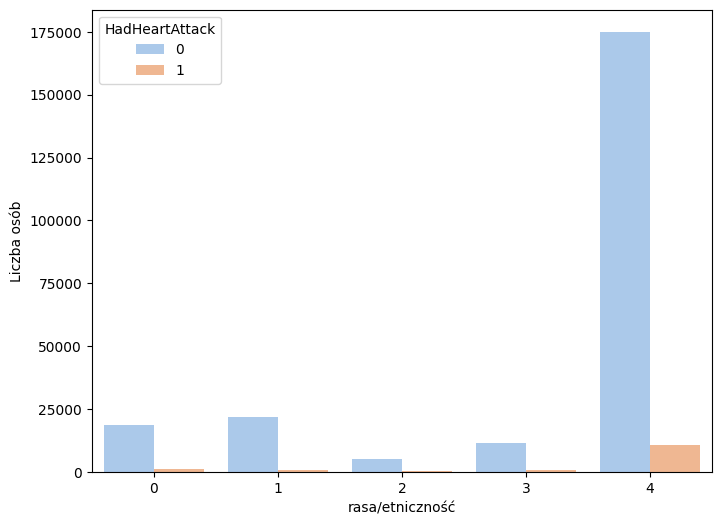

In [31]:
plt.figure(figsize=(8, 6))
sns.countplot(x="RaceEthnicityCategory", data=df, hue="HadHeartAttack", palette="pastel")
plt.xlabel('rasa/etniczność')
plt.ylabel('Liczba osób')
plt.show()

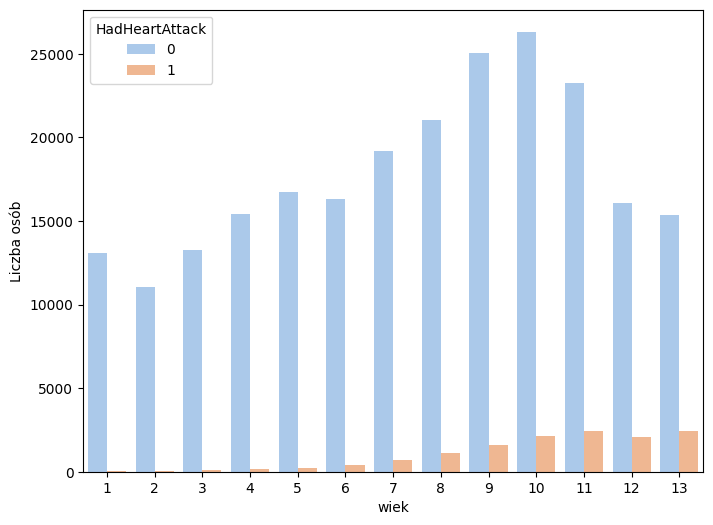

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(x="AgeCategory", data=df, hue="HadHeartAttack", palette="pastel")
plt.xlabel('wiek')
plt.ylabel('Liczba osób')
plt.show()

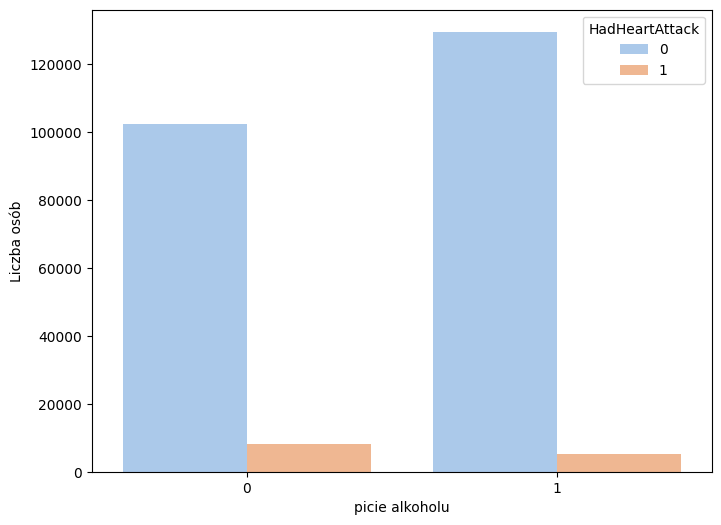

In [33]:
plt.figure(figsize=(8, 6))
sns.countplot(x="AlcoholDrinkers", data=df, hue="HadHeartAttack", palette="pastel")
plt.xlabel('picie alkoholu')
plt.ylabel('Liczba osób')
plt.show()

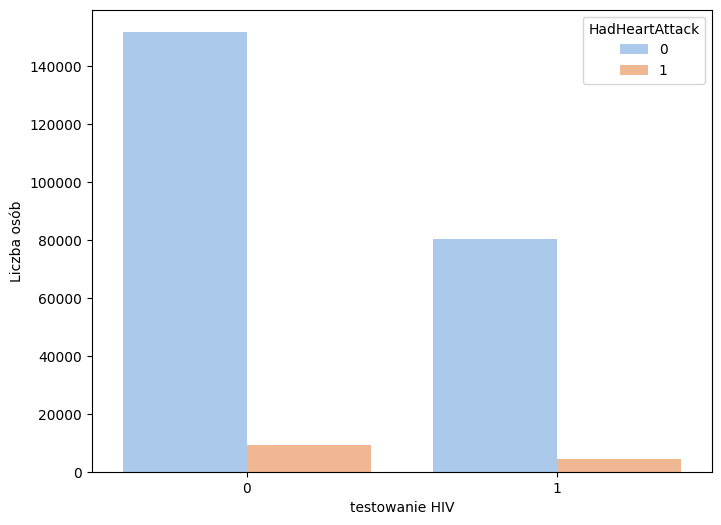

In [34]:
plt.figure(figsize=(8, 6))
sns.countplot(x="HIVTesting", data=df, hue="HadHeartAttack", palette="pastel")
plt.xlabel('testowanie HIV')
plt.ylabel('Liczba osób')
plt.show()

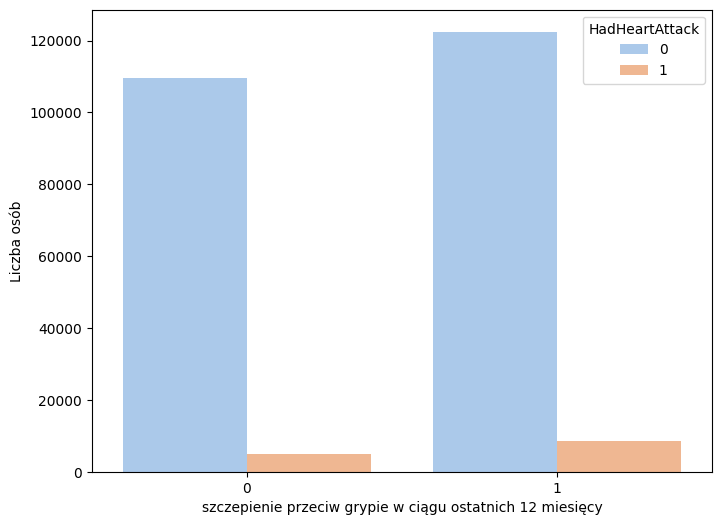

In [35]:
plt.figure(figsize=(8, 6))
sns.countplot(x="FluVaxLast12", data=df, hue="HadHeartAttack", palette="pastel")
plt.xlabel('szczepienie przeciw grypie w ciągu ostatnich 12 miesięcy')
plt.ylabel('Liczba osób')
plt.show()

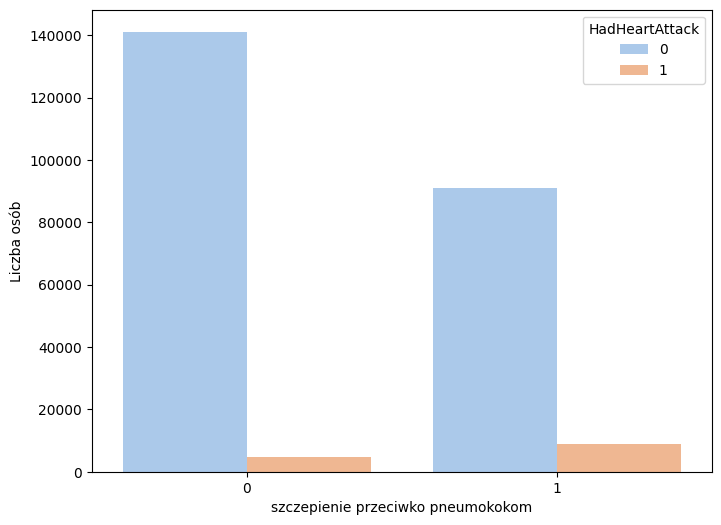

In [36]:
plt.figure(figsize=(8, 6))
sns.countplot(x="PneumoVaxEver", data=df, hue="HadHeartAttack", palette="pastel")
plt.xlabel('szczepienie przeciwko pneumokokom')
plt.ylabel('Liczba osób')
plt.show()

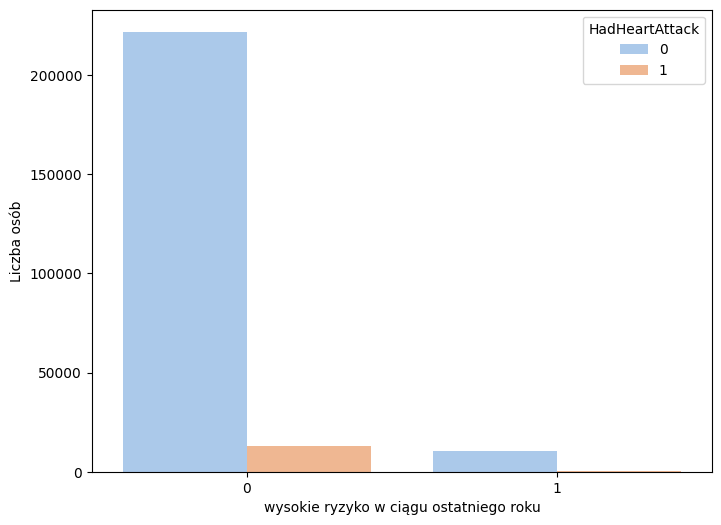

In [37]:
plt.figure(figsize=(8, 6))
sns.countplot(x="HighRiskLastYear", data=df, hue="HadHeartAttack", palette="pastel")
plt.xlabel('wysokie ryzyko w ciągu ostatniego roku')
plt.ylabel('Liczba osób')
plt.show()

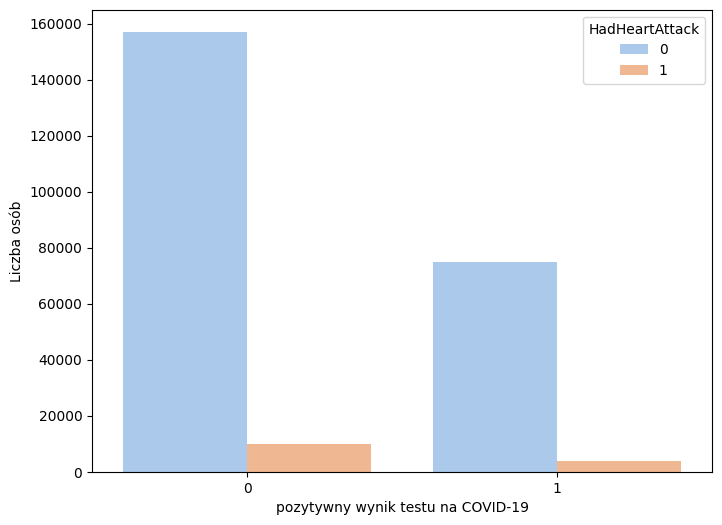

In [38]:
plt.figure(figsize=(8, 6))
sns.countplot(x="CovidPos", data=df, hue="HadHeartAttack", palette="pastel")
plt.xlabel('pozytywny wynik testu na COVID-19')
plt.ylabel('Liczba osób')
plt.show()

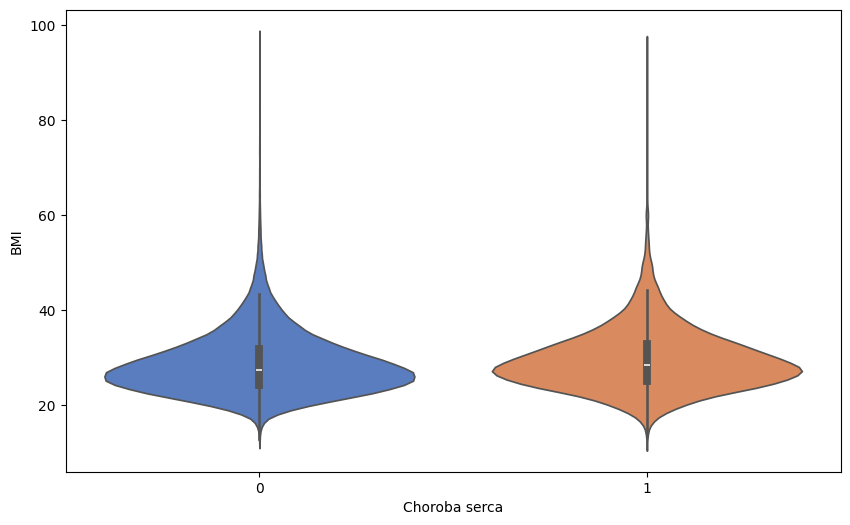

In [39]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='HadHeartAttack', y='BMI', data=df, palette="muted")
plt.xlabel("Choroba serca")
plt.ylabel("BMI")
plt.show()

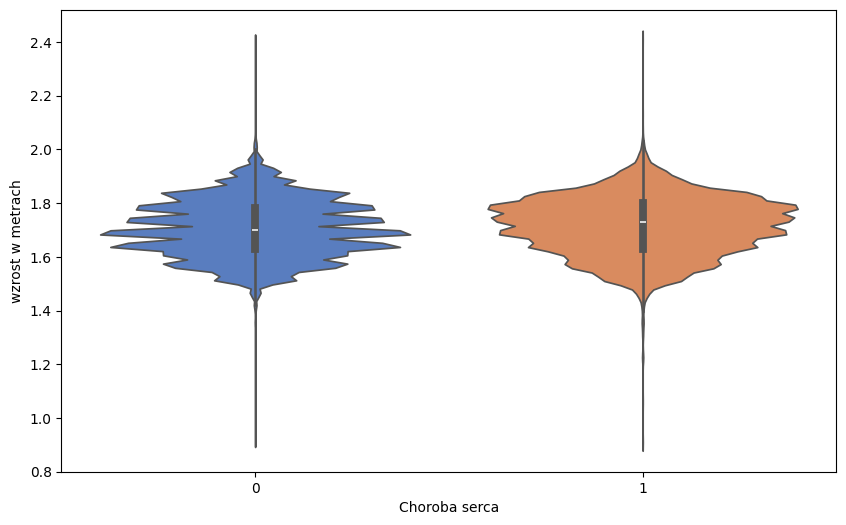

In [40]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='HadHeartAttack', y='HeightInMeters', data=df, palette="muted")
plt.xlabel("Choroba serca")
plt.ylabel("wzrost w metrach")
plt.show()


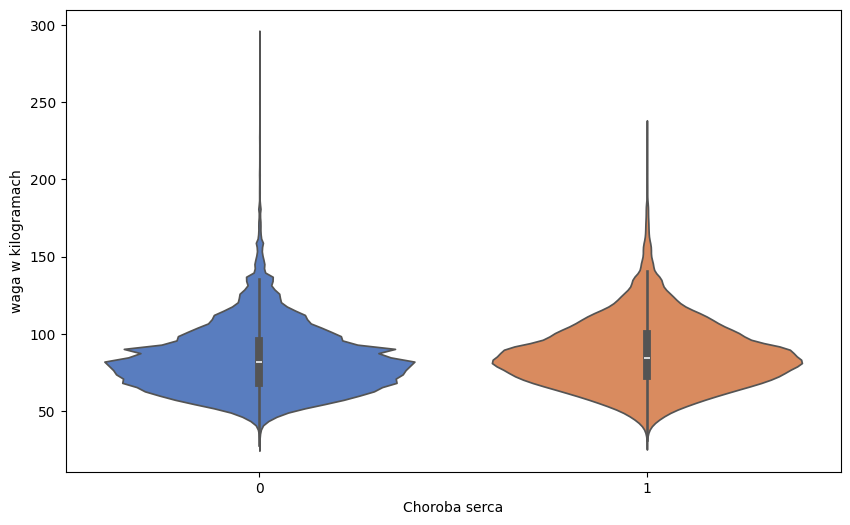

In [41]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='HadHeartAttack', y='WeightInKilograms', data=df, palette="muted")
plt.xlabel("Choroba serca")
plt.ylabel("waga w kilogramach")
plt.show()

## naszą cechą celu jest HeartDiseaseorAttack

In [42]:
da2=df['HadHeartAttack'].value_counts().reset_index(name='count')
da2

,HadHeartAttack,count
0,0,232061
1,1,13435


## Korelacja

<Axes: >

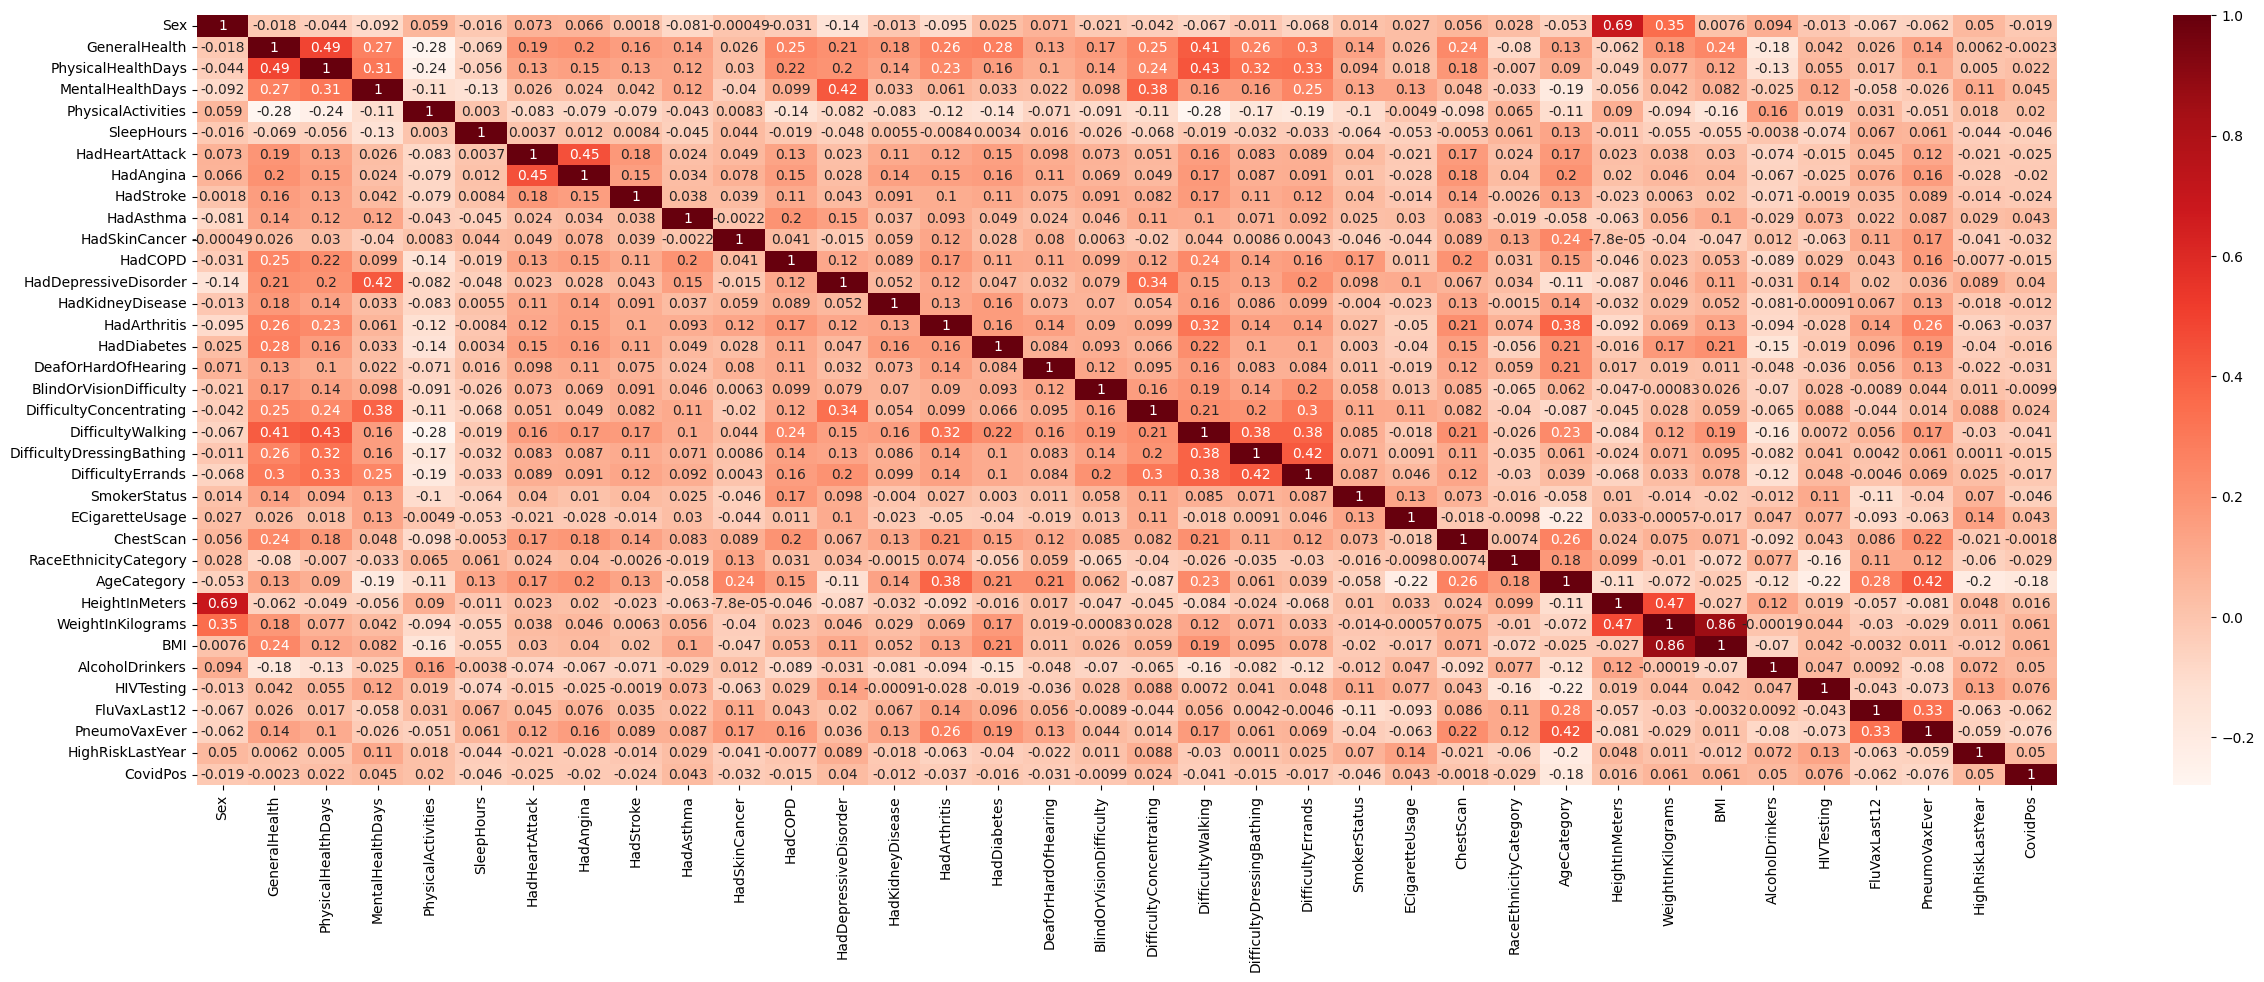

In [43]:
plt.figure(figsize = (30,10))
sns.heatmap(df.corr(),annot = True,cmap='Reds')

## VIF- sprawdzenie istotności cech

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
#data32.drop(['Height',"Weight"],axis=1,inplace=True)
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]
print(vif_data)

                      feature         VIF
0                         Sex    3.708738
1               GeneralHealth   11.507498
2          PhysicalHealthDays    1.947788
3            MentalHealthDays    1.865646
4          PhysicalActivities    5.265817
5                  SleepHours   25.656882
6              HadHeartAttack    1.376459
7                   HadAngina    1.410224
8                   HadStroke    1.129531
9                   HadAsthma    1.291818
10              HadSkinCancer    1.189156
11                    HadCOPD    1.299824
12      HadDepressiveDisorder    1.709748
13           HadKidneyDisease    1.133188
14               HadArthritis    2.046992
15                HadDiabetes    1.422392
16        DeafOrHardOfHearing    1.199074
17    BlindOrVisionDifficulty    1.148982
18    DifficultyConcentrating    1.490762
19          DifficultyWalking    1.913471
20  DifficultyDressingBathing    1.380599
21          DifficultyErrands    1.531725
22               SmokerStatus    1